<a href="https://colab.research.google.com/github/AaliyanShoaib/Convolutional-Neural-Network_for_Image-_Recognition/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, shutil
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models, optimizers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import imageio

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [90]:
!ls '/content/drive/My Drive'

 1669790999347.jpg				 EE21049CAASSIGNMENT.pdf
'1st Year.pdf'					'Getting started.pdf'
 2.gdoc						 sayiam2.gif
 2.pdf						 Untitled-3.gif
 4.gif						'Untitled document.gdoc'
 5.gif						'Untitled presentation.gslides'
 6.gif						'Untitled spreadsheet (1).gsheet'
'Audio from Aaliyan'				'Untitled spreadsheet.gsheet'
'Check out this file: 2nd year ECAT maths.pdf'	'VALO BOOSTING.gsheet'
'Colab Notebooks'				 valorant.gsheet
'Document from Aaliyan.pdf'


In [91]:
original_dataset_dir = "/content/drive/MyDrive/Colab Notebooks/project2"
base_dir = '/content/drive/My Drive/Colab Notebooks/working_directory2'

In [7]:
os.mkdir(base_dir)

In [8]:
train_dir =os.path.join(base_dir,'train')
os.mkdir(train_dir)
test_dir =os.path.join(base_dir,'test')
os.mkdir(test_dir)
validation_dir=os.path.join(base_dir,'validation')
os.mkdir(validation_dir)

In [86]:
total_ryan_dir = '/content/drive/My Drive/Colab Notebooks/working_directory2/total_ryan'
total_bale_dir = '/content/drive/My Drive/Colab Notebooks/working_directory2/total_bale'
train_Ryan_dir = '/content/drive/My Drive/Colab Notebooks/working_directory2/train_Ryan'
train_Bale_dir = '/content/drive/My Drive/Colab Notebooks/working_directory2/train_Bale'
os.mkdir(total_ryan_dir)
os.mkdir(total_bale_dir)
os.mkdir(train_Ryan_dir)
os.mkdir(train_Bale_dir)


In [92]:
train_ryan_dir=os.path.join(train_dir,'ryan')
os.mkdir(train_ryan_dir)
train_bale_dir=os.path.join(train_dir,'bale')
os.mkdir(train_bale_dir)
validation_ryan_dir=os.path.join(validation_dir,'ryan')
os.mkdir(validation_ryan_dir)
validation_bale_dir=os.path.join(validation_dir,'bale')
os.mkdir(validation_bale_dir)
test_ryan_dir=os.path.join(test_dir,'ryan')
os.mkdir(test_ryan_dir)
test_bale_dir=os.path.join(test_dir,'bale')
os.mkdir(test_bale_dir)

In [93]:
print('total training ryan images:', len(os.listdir(train_ryan_dir)))
print('total training bale images:', len(os.listdir(train_bale_dir)))
print('total validation ryan images:', len(os.listdir(validation_ryan_dir)))
print('total validation bale images:', len(os.listdir(validation_bale_dir)))
print('total testing ryan images:', len(os.listdir(test_ryan_dir)))
print('total testing bale images:', len(os.listdir(test_bale_dir)))

total training ryan images: 0
total training bale images: 0
total validation ryan images: 0
total validation bale images: 0
total testing ryan images: 0
total testing bale images: 0


/content/drive/MyDrive/Colab Notebooks/project2/Bale-8.jpg


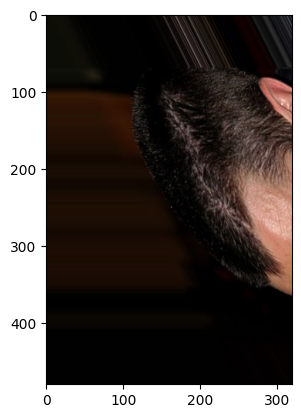

In [94]:
file_sample = os.path.join(original_dataset_dir, os.listdir(original_dataset_dir)[11])
print(file_sample)
img = plt.imread(file_sample)
data_generator = ImageDataGenerator()
tr_img = data_generator.apply_transform(img, {'theta': 90., 'shear': 30})
plt.imshow(tr_img);

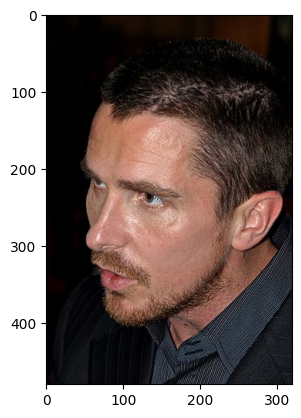

In [95]:
plt.imshow(img);

In [97]:
ryan_files = ['Ryan-{}.jpg'.format(i) for i in range(1, 10)]
data_generator = ImageDataGenerator()
for file in ryan_files:
    src_file_path = os.path.join(original_dataset_dir, file)
    img = plt.imread(src_file_path)

    flipped_hor_img = data_generator.apply_transform(img, {'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_image-")
    dst_file_path = os.path.join(total_ryan_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_img)

    flipped_ver_img = data_generator.apply_transform(img, {'flip_vertical': True})
    file_dst = file.replace("-", "-flipped_vertical_image-")
    dst_file_path = os.path.join(total_ryan_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_ver_img)

    flipped_hor_ver_img = data_generator.apply_transform(img, {'flip_vertical': True, 'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_vertical_image-")
    dst_file_path = os.path.join(total_ryan_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_ver_img)

    sheared_img = data_generator.apply_transform(img, {'shear': 30})
    file_dst = file.replace("-", "-sheared_image-")
    dst_file_path = os.path.join(total_ryan_dir, file_dst)
    imageio.imwrite(dst_file_path, sheared_img)
    for angle in range(0, 360, 30):
        rotated_img = data_generator.apply_transform(img, {'theta': angle})
        file_dst = file.replace("-", "-" + str(angle) + "-")
        dst_file_path = os.path.join(total_ryan_dir, file_dst)
        imageio.imwrite(dst_file_path, rotated_img)


In [98]:
bale_files = ['Bale-{}.jpg'.format(i) for i in range(1, 10)]
data_generator = ImageDataGenerator()
for file in bale_files:
    src_file_path = os.path.join(original_dataset_dir, file)
    img = plt.imread(src_file_path)

    flipped_hor_img = data_generator.apply_transform(img, {'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_image-")
    dst_file_path = os.path.join(total_bale_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_img)

    flipped_ver_img = data_generator.apply_transform(img, {'flip_vertical': True})
    file_dst = file.replace("-", "-flipped_vertical_image-")
    dst_file_path = os.path.join(total_bale_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_ver_img)

    flipped_hor_ver_img = data_generator.apply_transform(img, {'flip_vertical': True, 'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_vertical_image-")
    dst_file_path = os.path.join(total_bale_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_ver_img)

    sheared_img = data_generator.apply_transform(img, {'shear': 30})
    file_dst = file.replace("-", "-sheared_image-")
    dst_file_path = os.path.join(total_bale_dir, file_dst)
    imageio.imwrite(dst_file_path, sheared_img)
    for angle in range(0, 360, 30):
        rotated_img = data_generator.apply_transform(img, {'theta': angle})
        file_dst = file.replace("-", "-" + str(angle) + "-")
        dst_file_path = os.path.join(total_bale_dir, file_dst)
        imageio.imwrite(dst_file_path, rotated_img)



In [99]:
print('total_ryan:', len(os.listdir(total_ryan_dir)))
print('total_bale:', len(os.listdir(total_bale_dir)))


total_ryan: 144
total_bale: 144


In [100]:
from sklearn.model_selection import train_test_split

all_files = [f for f in os.listdir(total_ryan_dir) if os.path.isfile(os.path.join(total_ryan_dir, f))]
train_files, test_files = train_test_split(all_files, test_size=0.111, random_state=42)

In [101]:
def copy_files(file_list, src_dir, dst_dir):
    for fname in file_list:
        src_path = os.path.join(src_dir, fname)
        dst_path = os.path.join(dst_dir, fname)
        shutil.copyfile(src_path, dst_path)

In [102]:
copy_files(train_files, total_ryan_dir, train_Ryan_dir)
copy_files(test_files, total_ryan_dir, test_ryan_dir)

In [103]:
print(f'Total training images: {len(os.listdir(train_Ryan_dir))}')
print(f'Total testing images: {len(os.listdir(test_ryan_dir))}')

Total training images: 128
Total testing images: 16


In [104]:
all_files = [f for f in os.listdir(total_bale_dir) if os.path.isfile(os.path.join(total_bale_dir, f))]


train_files, test_files = train_test_split(all_files, test_size=0.111, random_state=42)

In [105]:
copy_files(train_files, total_bale_dir, train_Bale_dir)
copy_files(test_files, total_bale_dir, test_bale_dir)


print(f'Total training images: {len(os.listdir(train_Bale_dir))}')
print(f'Total testing images: {len(os.listdir(test_bale_dir))}')

Total training images: 128
Total testing images: 16


In [108]:
all_files = [f for f in os.listdir(train_Ryan_dir) if os.path.isfile(os.path.join(train_Ryan_dir, f))]
train_files, test_files = train_test_split(all_files, test_size=0.111, random_state=42)





In [109]:
copy_files(train_files, train_Ryan_dir, train_ryan_dir)
copy_files(test_files, train_Ryan_dir, validation_ryan_dir)


print(f'Total training images: {len(os.listdir(train_ryan_dir))}')
print(f'Total validation images: {len(os.listdir(validation_ryan_dir))}')

Total training images: 113
Total validation images: 15


In [110]:
all_files = [f for f in os.listdir(train_Bale_dir) if os.path.isfile(os.path.join(train_Bale_dir, f))]
train_files, test_files = train_test_split(all_files, test_size=0.111, random_state=42)

In [113]:
copy_files(train_files, train_Bale_dir, train_bale_dir)
copy_files(test_files, train_Bale_dir, validation_bale_dir)

# Print out the number of files copied
print(f'Total training images: {len(os.listdir(train_bale_dir))}')
print(f'Total validation images: {len(os.listdir(validation_bale_dir))}')

Total training images: 113
Total validation images: 15


**Model** **Building** **Fitting** **and** **Plotting**

In [116]:
model= models.Sequential()

#convolutional base
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#Flatten
model.add(layers.Flatten())

#Dense classifier
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [117]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [121]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
#Rescaling

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size=(150, 150),
                  batch_size=20,
                  class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 226 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [122]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 12/100 ━━━━━━━━━━━━━━━━━━━━ 1:36 1s/step - acc: 0.4372 - loss: 0.7046

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 132ms/step - acc: 0.4613 - loss: 0.7015 - val_acc: 0.5000 - val_loss: 0.6907
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 125ms/step - acc: 0.5982 - loss: 0.6780 - val_acc: 0.7667 - val_loss: 0.6550
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - acc: 0.6199 - loss: 0.6760 - val_acc: 0.7333 - val_loss: 0.6461
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 121ms/step - acc: 0.6307 - loss: 0.6469 - val_acc: 0.8000 - val_loss: 0.5973
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 131ms/step - acc: 0.6631 - loss: 0.6379 - val_acc: 0.7000 - val_loss: 0.5619
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 133ms/step - acc: 0.6790 - loss: 0.6207 - val_acc: 0.8333 - val_loss: 0.5363
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 150ms/step - acc: 0.7023 - loss: 0.5697 - val_acc: 0.7333 - val_loss: 0.5264
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 126ms/step - acc: 0.7127 - loss: 0.5747 - val_acc: 0.8333 - val_loss: 0.4805
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s

In [156]:
model.save('project2.h5')

-rw-r--r-- 1 root root 27679224 Sep  7 14:13 project2.h5


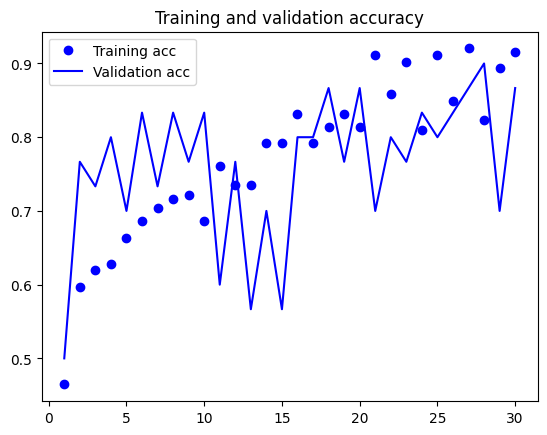

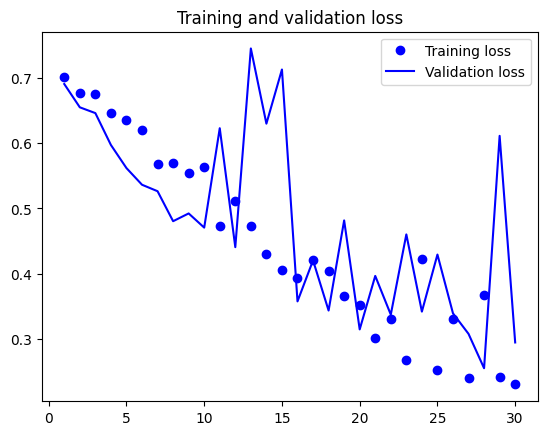

In [125]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**Data augmentation by ImageDataGenerator**

In [126]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

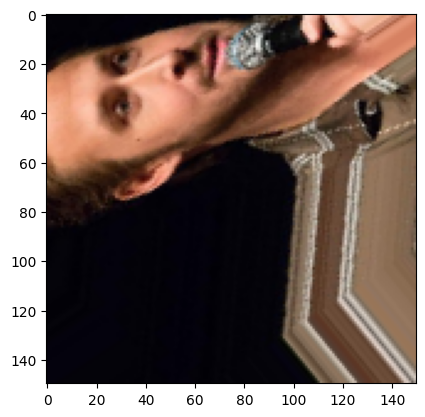

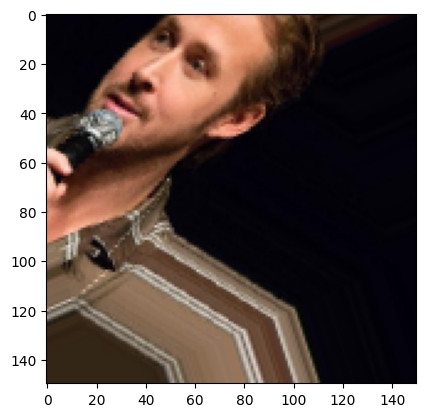

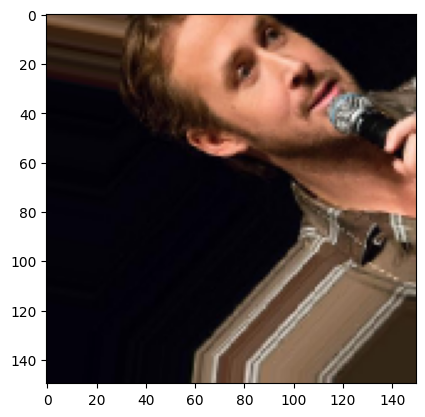

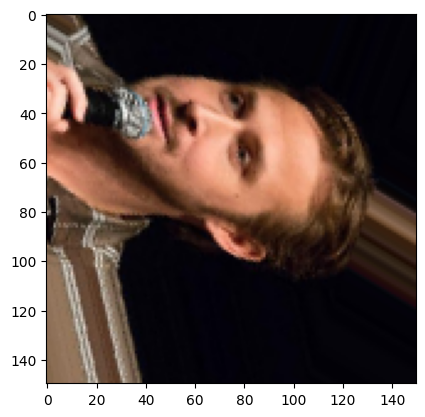

In [128]:
from keras.preprocessing import image

fnames = [os.path.join(train_ryan_dir, fname) for fname in os.listdir(train_ryan_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

**New Model includes dropout**

In [130]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [131]:
model2.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(learning_rate=1e-4),
metrics=['acc'])

**Train using Data Augmentation**

In [132]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 226 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


**Fitting and Plotting**

In [133]:
history = model2.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  8/100 ━━━━━━━━━━━━━━━━━━━━ 2:50 2s/step - acc: 0.4353 - loss: 0.6950

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 140ms/step - acc: 0.4867 - loss: 0.6976 - val_acc: 0.7333 - val_loss: 0.6866
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 120ms/step - acc: 0.5582 - loss: 0.6859 - val_acc: 0.5000 - val_loss: 0.6744
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 121ms/step - acc: 0.5183 - loss: 0.6910 - val_acc: 0.5667 - val_loss: 0.6779
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 120ms/step - acc: 0.5772 - loss: 0.6828 - val_acc: 0.6667 - val_loss: 0.6685
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 121ms/step - acc: 0.5553 - loss: 0.6868 - val_acc: 0.7333 - val_loss: 0.6628
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 136ms/step - acc: 0.5826 - loss: 0.6734 - val_acc: 0.6000 - val_loss: 0.6561
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 146ms/step - acc: 0.5917 - loss: 0.6680 - val_acc: 0.6000 - val_loss: 0.6468
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 123ms/step - acc: 0.6202 - loss: 0.6924 - val_acc: 0.8333 - val_loss: 0.6143
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━

In [134]:
model2.save('project02.h5')

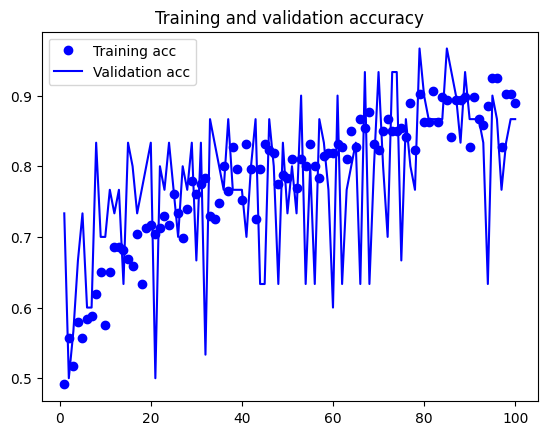

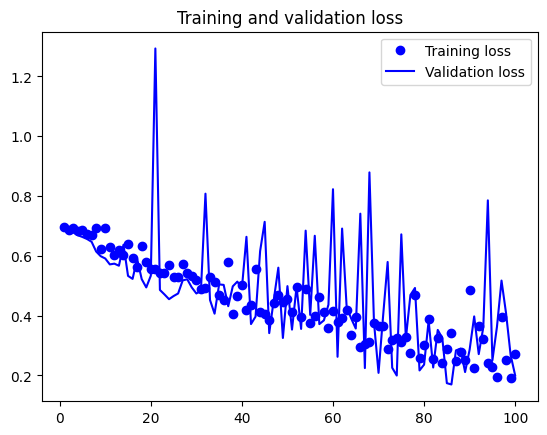

In [135]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**FAST FEATURE EXTRACTION WITHOUT DATA AUGMENTATION**

In [139]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [136]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [137]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [140]:
def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
      directory,
      target_size=(150, 150),
      batch_size=batch_size,
      class_mode='binary')
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
  return features, labels

train_features, train_labels = extract_features(train_dir, 226)
validation_features, validation_labels = extract_features(validation_dir, 30)
test_features, test_labels = extract_features(test_dir, 32)

Found 226 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Found 30 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Found 32 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [141]:
train_features = np.reshape(train_features, (226, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (30, 4 * 4 * 512))
test_features = np.reshape(test_features, (32, 4 * 4 * 512))

**FEATURE EXTRACTION WITH DATA AUGMENTATION**

In [142]:
from keras import models
from keras import layers
from keras import optimizers


model3 = models.Sequential()
model3.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [143]:
model3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,097,665 (8.00 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 0 (0.00 B)

In [144]:
model3.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

In [146]:
history = model3.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - acc: 0.5582 - loss: 0.7740 - val_acc: 0.6000 - val_loss: 0.6734
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - acc: 0.5420 - loss: 0.7287 - val_acc: 0.5333 - val_loss: 0.6613
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - acc: 0.6797 - loss: 0.6290 - val_acc: 0.6667 - val_loss: 0.6272
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - acc: 0.6396 - loss: 0.6120 - val_acc: 0.6333 - val_loss: 0.6287
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - acc: 0.6653 - loss: 0.5994 - val_acc: 0.7000 - val_loss: 0.5999
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - acc: 0.7342 - loss: 0.5402 - val_acc: 0.6667 - val_loss: 0.6058
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - acc: 0.7230 - loss: 0.5602 - val_acc: 0.7333 - val_loss: 0.5793
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - acc: 0.7608 - loss: 0.5159 - val_acc: 0.7000 - val_loss: 0.5713
Epoch 9/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - acc: 0.7630

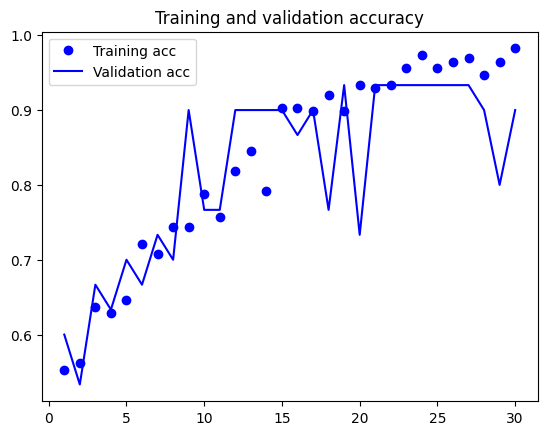

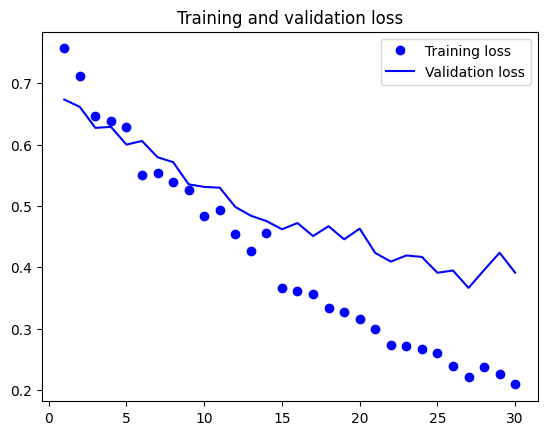

In [147]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [148]:
model3 = models.Sequential()
model3.add(conv_base)
model3.add(layers.Flatten())
model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

In [150]:
print('This is the number of trainable weights '
'before freezing the conv base:', len(model3.trainable_weights))

conv_base.trainable = False

print('This is the number of trainable weights '
'after freezing the conv base:', len(model3.trainable_weights))



This is the number of trainable weights before freezing the conv base: 26
This is the number of trainable weights after freezing the conv base: 0


In [151]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 226 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [152]:
model3.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

In [153]:
history = model3.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 12/100 ━━━━━━━━━━━━━━━━━━━━ 7:45 5s/step - acc: 0.5543 - loss: 0.7137

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 75s 664ms/step - acc: 0.5338 - loss: 0.7065 - val_acc: 0.5667 - val_loss: 0.6746
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 85s 687ms/step - acc: 0.6271 - loss: 0.6706 - val_acc: 0.6667 - val_loss: 0.6393
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 81s 673ms/step - acc: 0.5883 - loss: 0.6489 - val_acc: 0.7667 - val_loss: 0.6170
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 74s 687ms/step - acc: 0.6597 - loss: 0.6271 - val_acc: 0.8000 - val_loss: 0.5901
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 82s 678ms/step - acc: 0.6903 - loss: 0.6088 - val_acc: 0.7667 - val_loss: 0.5777
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 77s 724ms/step - acc: 0.7290 - loss: 0.5930 - val_acc: 0.7333 - val_loss: 0.5691
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 80s 679ms/step - acc: 0.7564 - loss: 0.5647 - val_acc: 0.8667 - val_loss: 0.5448
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 79s 652ms/step - acc: 0.7852 - loss: 0.5525 - val_acc: 0.7667 - val_loss: 0.5402
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 87s

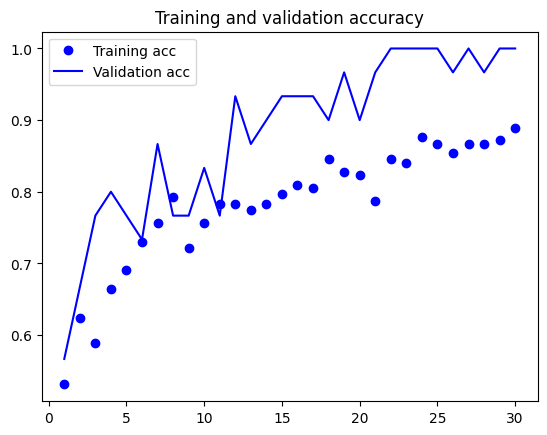

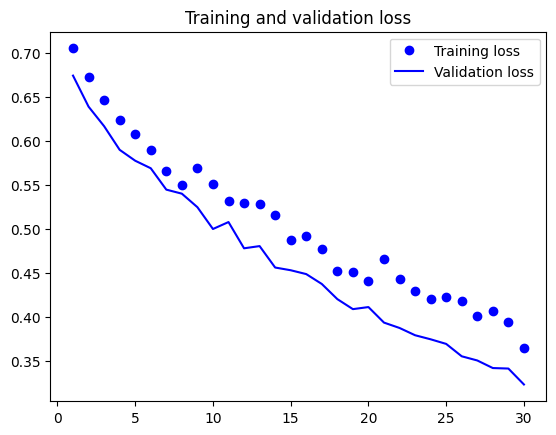

In [154]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [155]:
model3.save('project222.h5')

In [158]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

**CNN TESTING**

In [159]:
model = load_model('project2.h5')
predlist = []

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,123 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Loaded image: Ryan-30-8.jpg


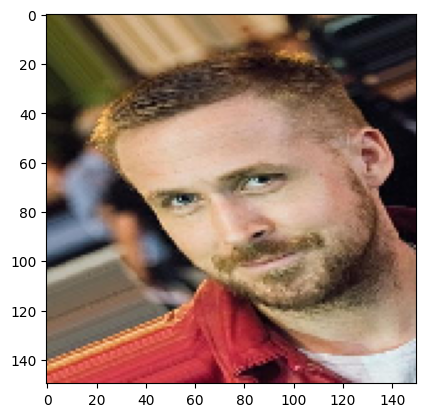

Ryan






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Loaded image: Ryan-sheared_image-2.jpg


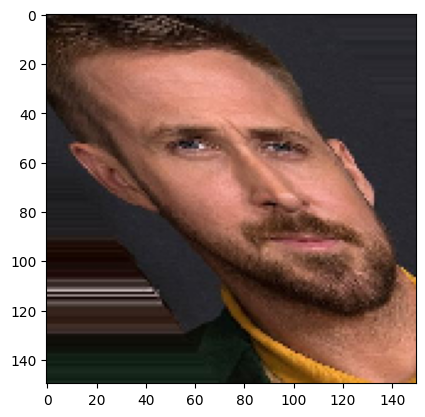

Ryan






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Loaded image: Ryan-flipped_horizontal_vertical_image-6.jpg


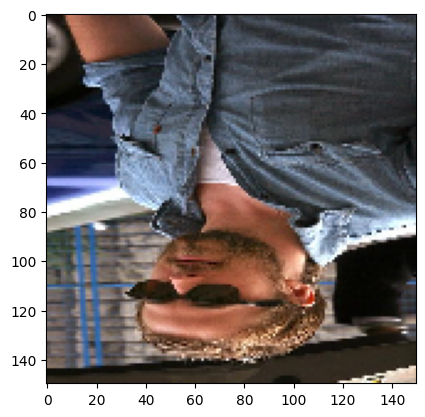

Bale






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Loaded image: Ryan-flipped_vertical_image-7.jpg


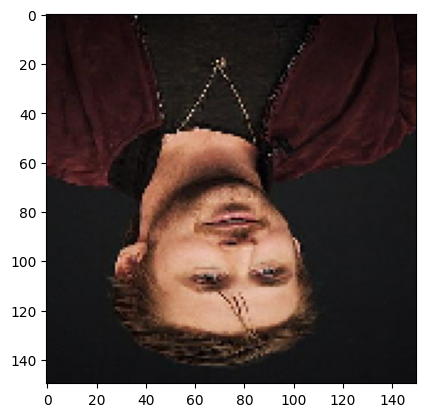

Ryan






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Loaded image: Ryan-120-4.jpg


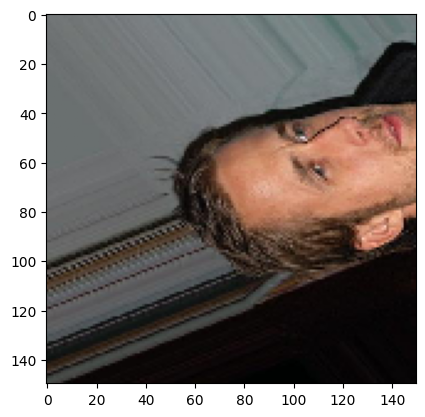

Ryan






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Loaded image: Ryan-240-1.jpg


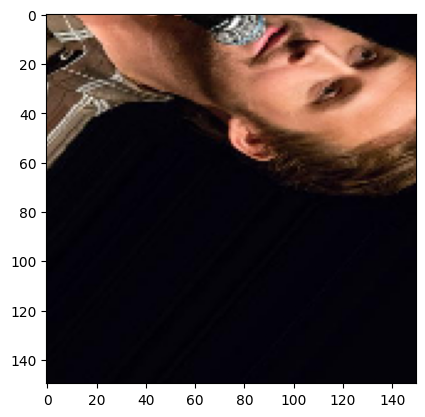

Ryan






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Loaded image: Ryan-0-9.jpg


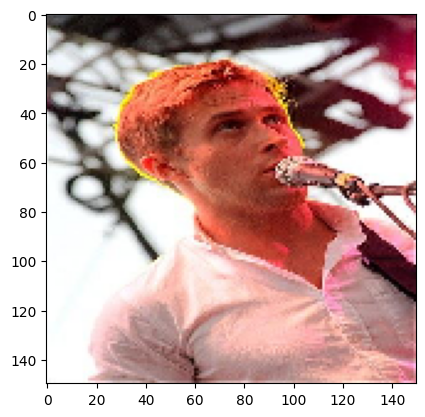

Ryan






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Loaded image: Ryan-flipped_vertical_image-5.jpg


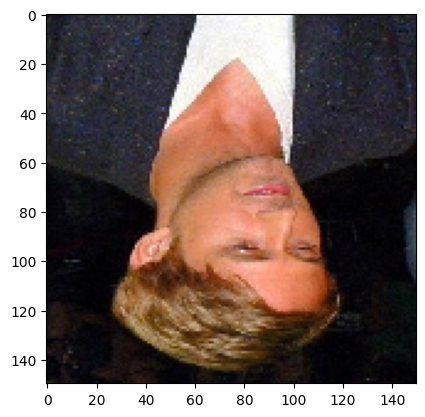

Ryan






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Loaded image: Ryan-flipped_horizontal_vertical_image-5.jpg


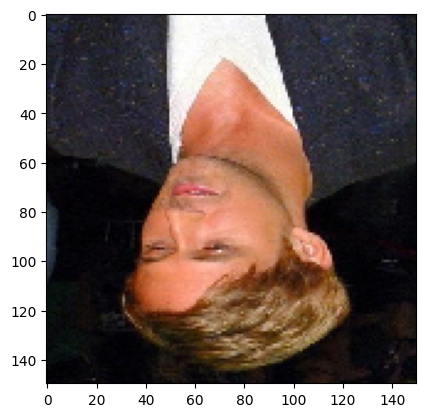

Ryan






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Loaded image: Ryan-flipped_horizontal_vertical_image-2.jpg


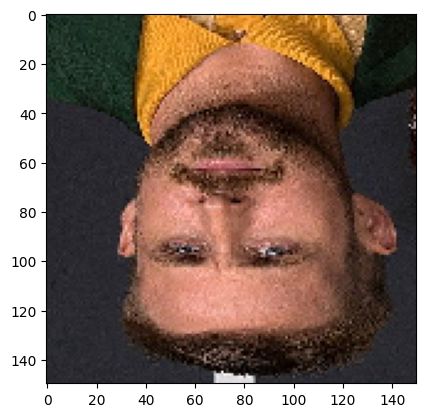

Ryan






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Loaded image: Ryan-sheared_image-4.jpg


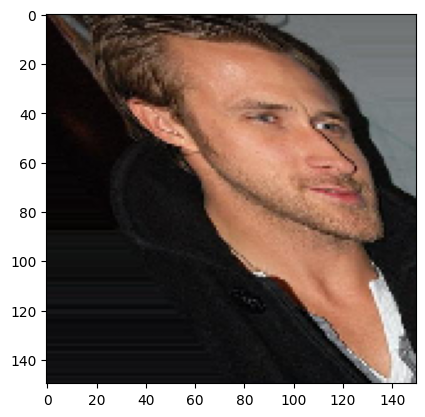

Ryan






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Loaded image: Ryan-300-5.jpg


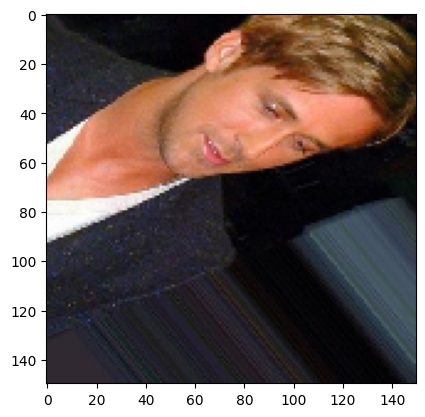

Ryan






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Loaded image: Ryan-300-6.jpg


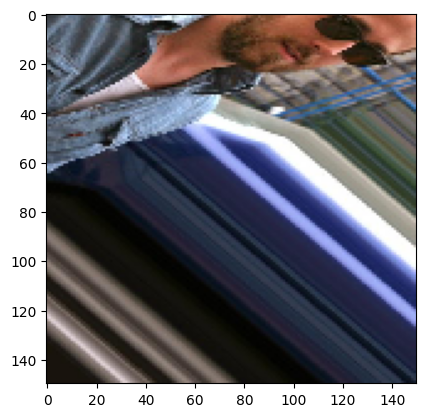

Bale






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Loaded image: Ryan-30-9.jpg


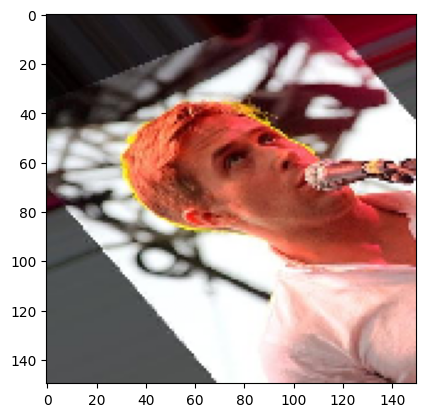

Ryan






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Loaded image: Ryan-0-7.jpg


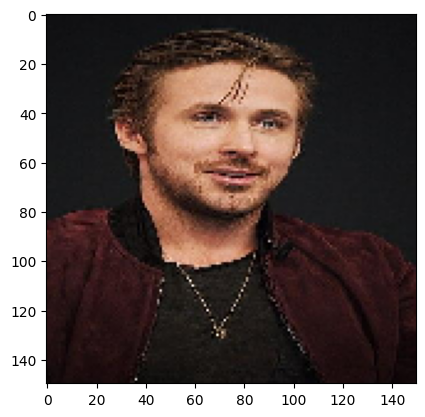

Ryan






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Loaded image: Ryan-flipped_horizontal_image-5.jpg


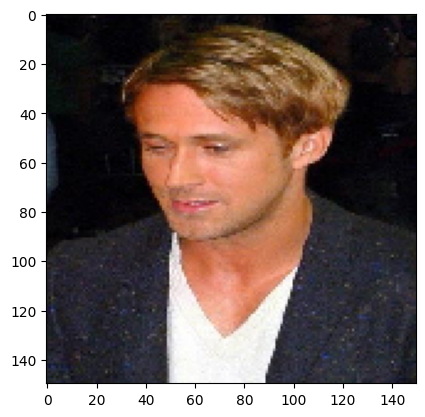

Ryan








In [160]:
# Directory containing the images
img_directory = '/content/drive/MyDrive/Colab Notebooks/working_directory2/test/ryan'

# List all files in the directory
all_files = os.listdir(img_directory)

# Filter out only the .jpg files
jpg_files = [f for f in all_files if f.endswith('.jpg')]
i=0
# Load each image
for img_file in jpg_files:
    img_path = os.path.join(img_directory, img_file)
    # Load the image
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /=255.
    predlist.append(model.predict(img_tensor))
    print(f"Loaded image: {img_file}")
    plt.imshow(img_tensor[0])
    plt.show()
    if predlist[i] >= 0.50:                  #sigmoid activation function(range: 0 - 1)- 1st category: Ryan - 0,
                                                                                 #2nd category: Bale - 1

      print("Ryan\n\n\n\n\n\n")

    else:
      print("Bale\n\n\n\n\n\n")

    i+=1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Loaded image: Bale-30-8.jpg


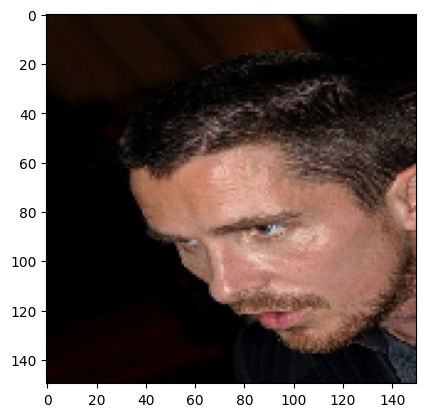

Ryan






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Loaded image: Bale-sheared_image-2.jpg


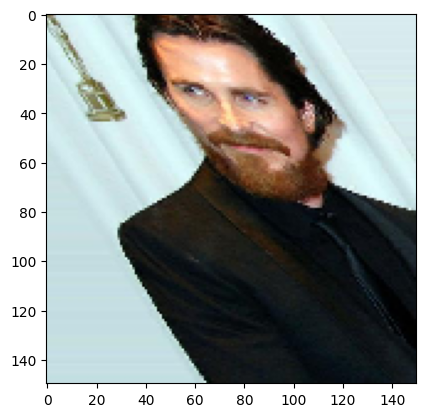

Bale






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Loaded image: Bale-flipped_horizontal_vertical_image-6.jpg


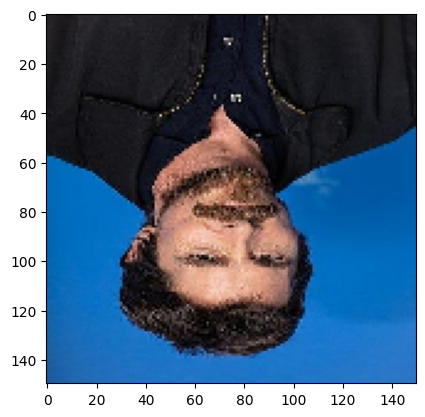

Bale






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Loaded image: Bale-flipped_vertical_image-7.jpg


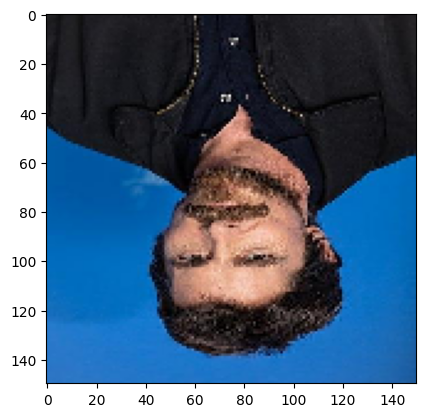

Bale






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Loaded image: Bale-120-4.jpg


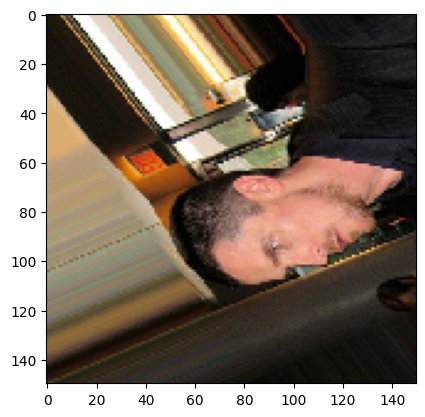

Bale






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Loaded image: Bale-240-1.jpg


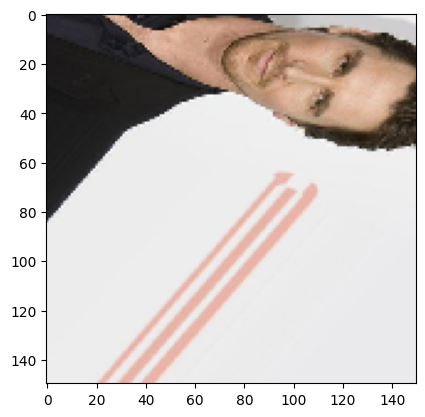

Bale






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Loaded image: Bale-0-9.jpg


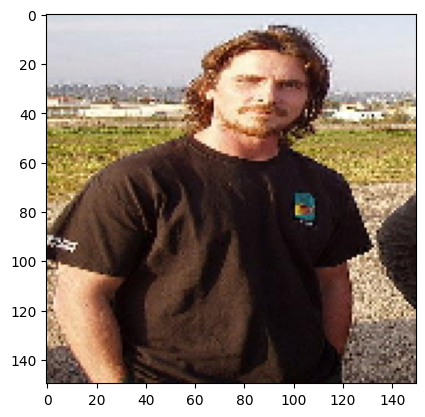

Bale






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Loaded image: Bale-flipped_vertical_image-5.jpg


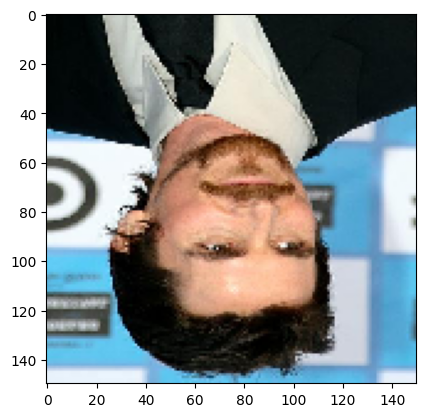

Bale






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Loaded image: Bale-flipped_horizontal_vertical_image-5.jpg


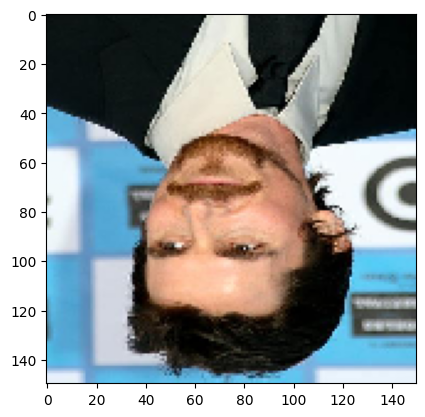

Bale






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Loaded image: Bale-flipped_horizontal_vertical_image-2.jpg


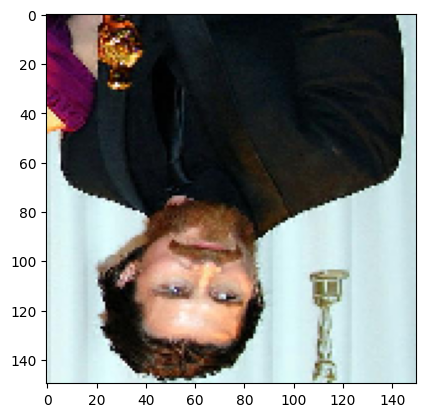

Bale






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Loaded image: Bale-sheared_image-4.jpg


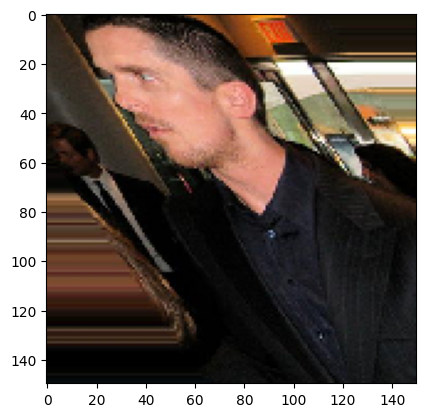

Bale






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Loaded image: Bale-300-5.jpg


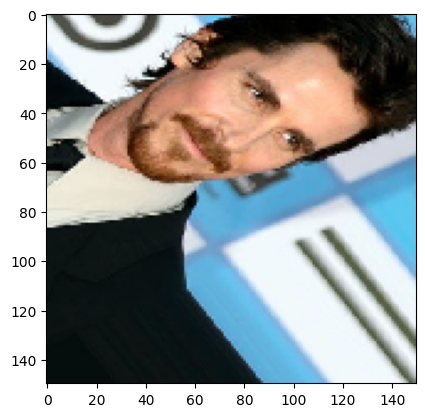

Bale






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Loaded image: Bale-300-6.jpg


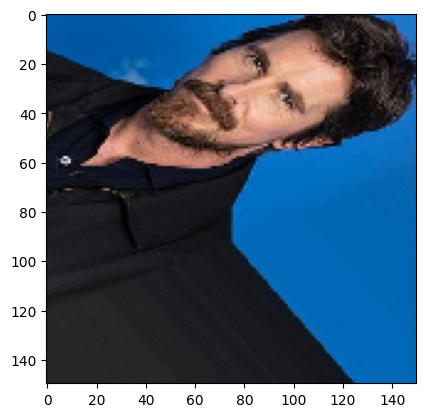

Bale






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Loaded image: Bale-30-9.jpg


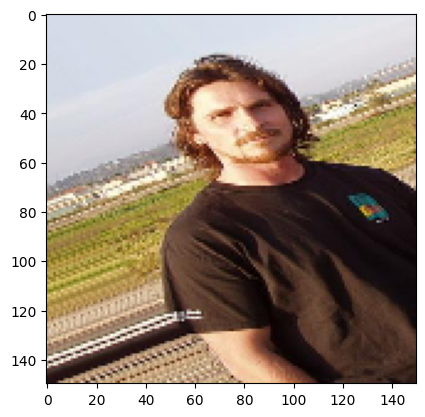

Bale






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Loaded image: Bale-0-7.jpg


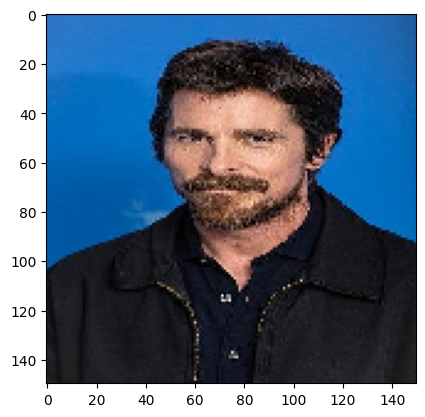

Bale






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Loaded image: Bale-flipped_horizontal_image-5.jpg


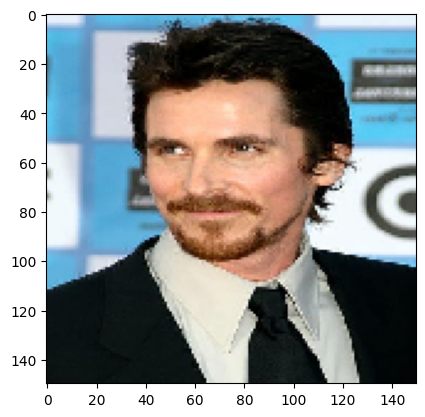

Bale








In [161]:
# Directory containing the images
img_directory = '/content/drive/MyDrive/Colab Notebooks/working_directory2/test/bale'

# List all files in the directory
all_files = os.listdir(img_directory)

# Filter out only the .jpg files
jpg_files = [f for f in all_files if f.endswith('.jpg')]
predlist = []
i=0
# Load each image
for img_file in jpg_files:
    img_path = os.path.join(img_directory, img_file)
    # Load the image
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /=255.
    predlist.append(model.predict(img_tensor))
    print(f"Loaded image: {img_file}")
    plt.imshow(img_tensor[0])
    plt.show()
    if predlist[i] >= 0.50:                  #sigmoid activation function(range: 0 - 1)- 1st category: Ryan - 0,
                                                                                 #2nd category: Bale - 1

      print("bale\n\n\n\n\n\n")

    else:
      print("Ryan\n\n\n\n\n\n")

    i+=1